<a href="https://www.kaggle.com/code/soumodeep12002740/customer-segmentation-binge?scriptVersionId=148688831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})



In [7]:
# Fill missing values

df.fillna(df.mean(), inplace=True)


# Normalize the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# K-Means

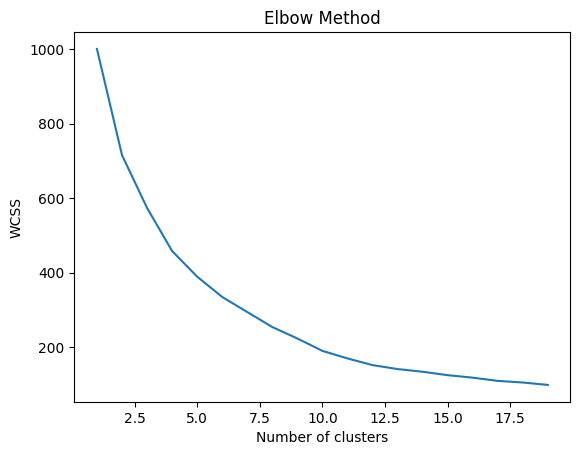

In [8]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df_scaled)


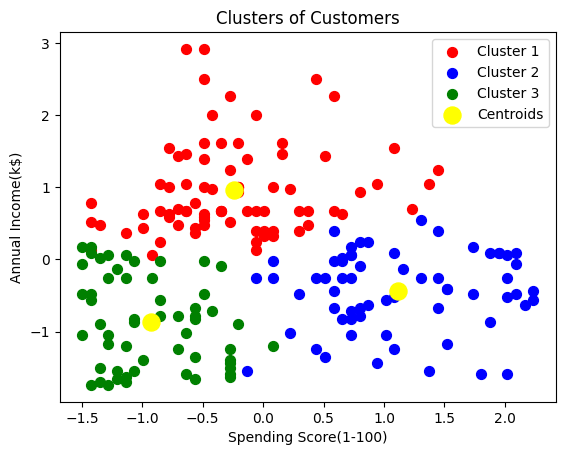

In [10]:
plt.scatter(df_scaled[pred_y == 0, 2], df_scaled[pred_y == 0, 3], s=50, c='red', label ='Cluster 1')
plt.scatter(df_scaled[pred_y == 1, 2], df_scaled[pred_y == 1, 3], s=50, c='blue', label ='Cluster 2')
plt.scatter(df_scaled[pred_y == 2, 2], df_scaled[pred_y == 2, 3], s=50, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=150, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.ylabel('Annual Income(k$)')
plt.xlabel('Spending Score(1-100)')
plt.legend()
plt.show()


# Hierarchical Clustering:

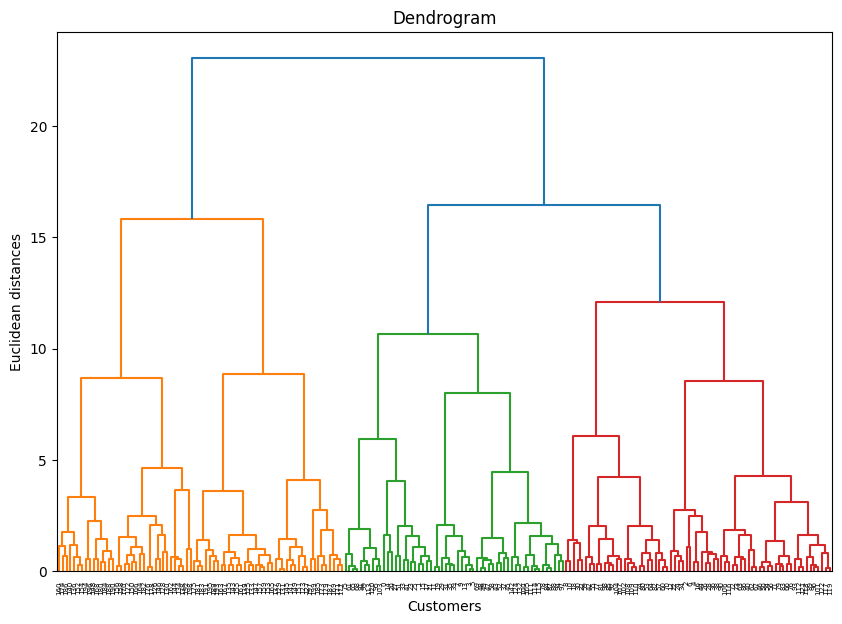

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Create a linkage matrix using ward linkage
linked = linkage(df_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fit the model and predict
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
pred_y_hc = cluster.fit_predict(df_scaled)


# Silhouette Score & Davies-Bouldin Score

In [12]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette Score
print("Silhouette Score for KMeans: ", silhouette_score(df_scaled, pred_y))
print("Silhouette Score for Hierarchical Clustering: ", silhouette_score(df_scaled, pred_y_hc))


# Davies-Bouldin Score
print("Davies-Bouldin Score for KMeans: ", davies_bouldin_score(df_scaled, pred_y))
print("Davies-Bouldin Score for Hierarchical Clustering: ", davies_bouldin_score(df_scaled, pred_y_hc))


Silhouette Score for KMeans:  0.25477077954736904
Silhouette Score for Hierarchical Clustering:  0.2363944459266719
Davies-Bouldin Score for KMeans:  1.340747672363204
Davies-Bouldin Score for Hierarchical Clustering:  1.445010815576129
